In [63]:
%load_ext autoreload
%autoreload 2
import os
from os.path import join as oj
import pickle as pkl
from typing import Dict, Any

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import dvu
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 250

# change working directory to project root
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('../..')
from experiments.notebooks import viz
from experiments.data_util import get_clean_dataset
from experiments.config.datasets import DATASETS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


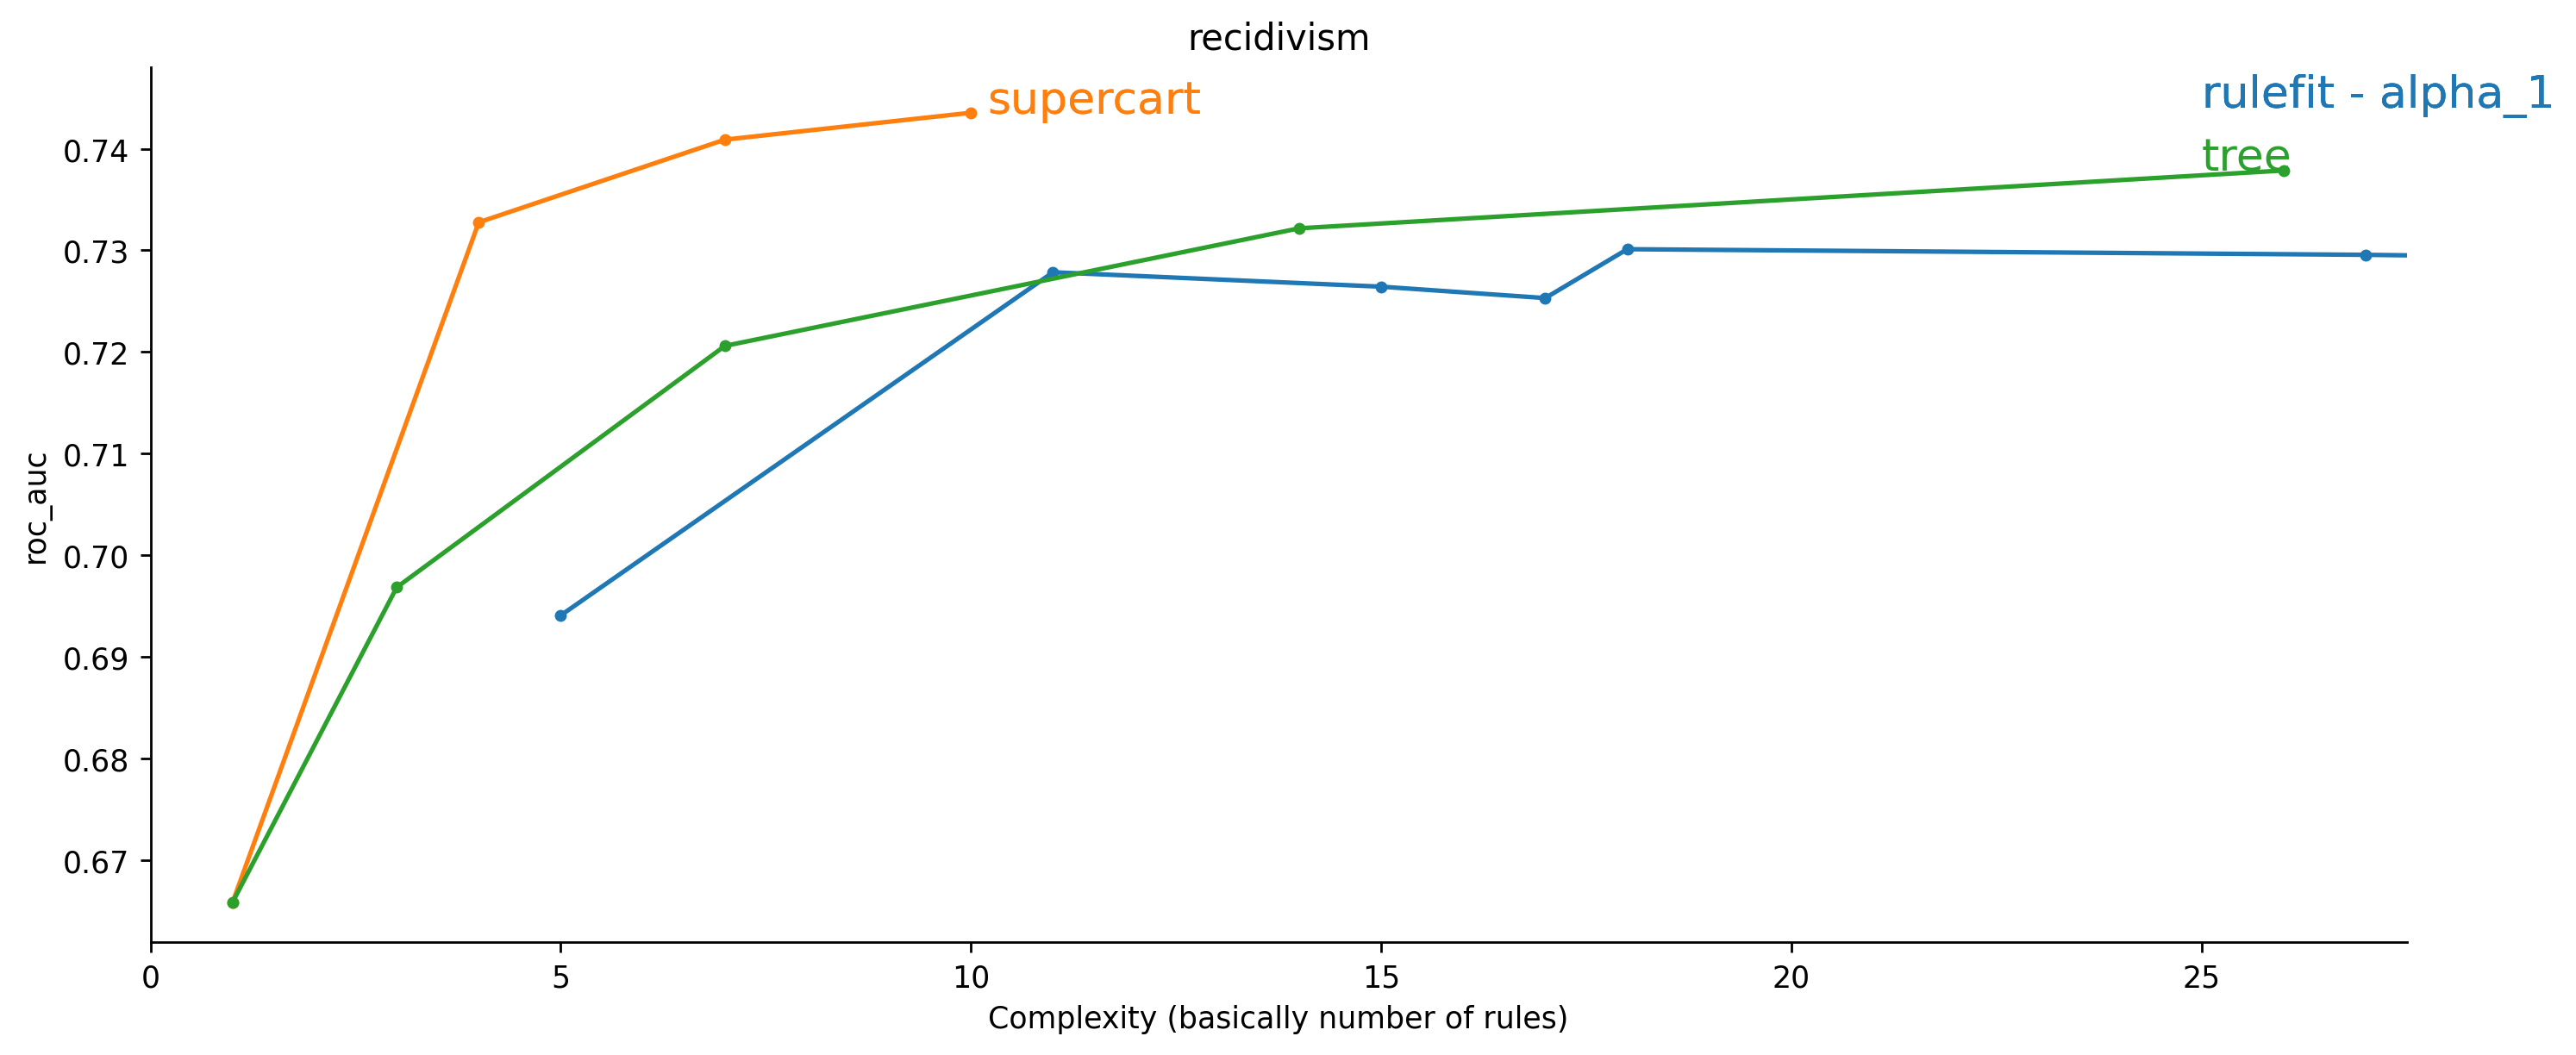

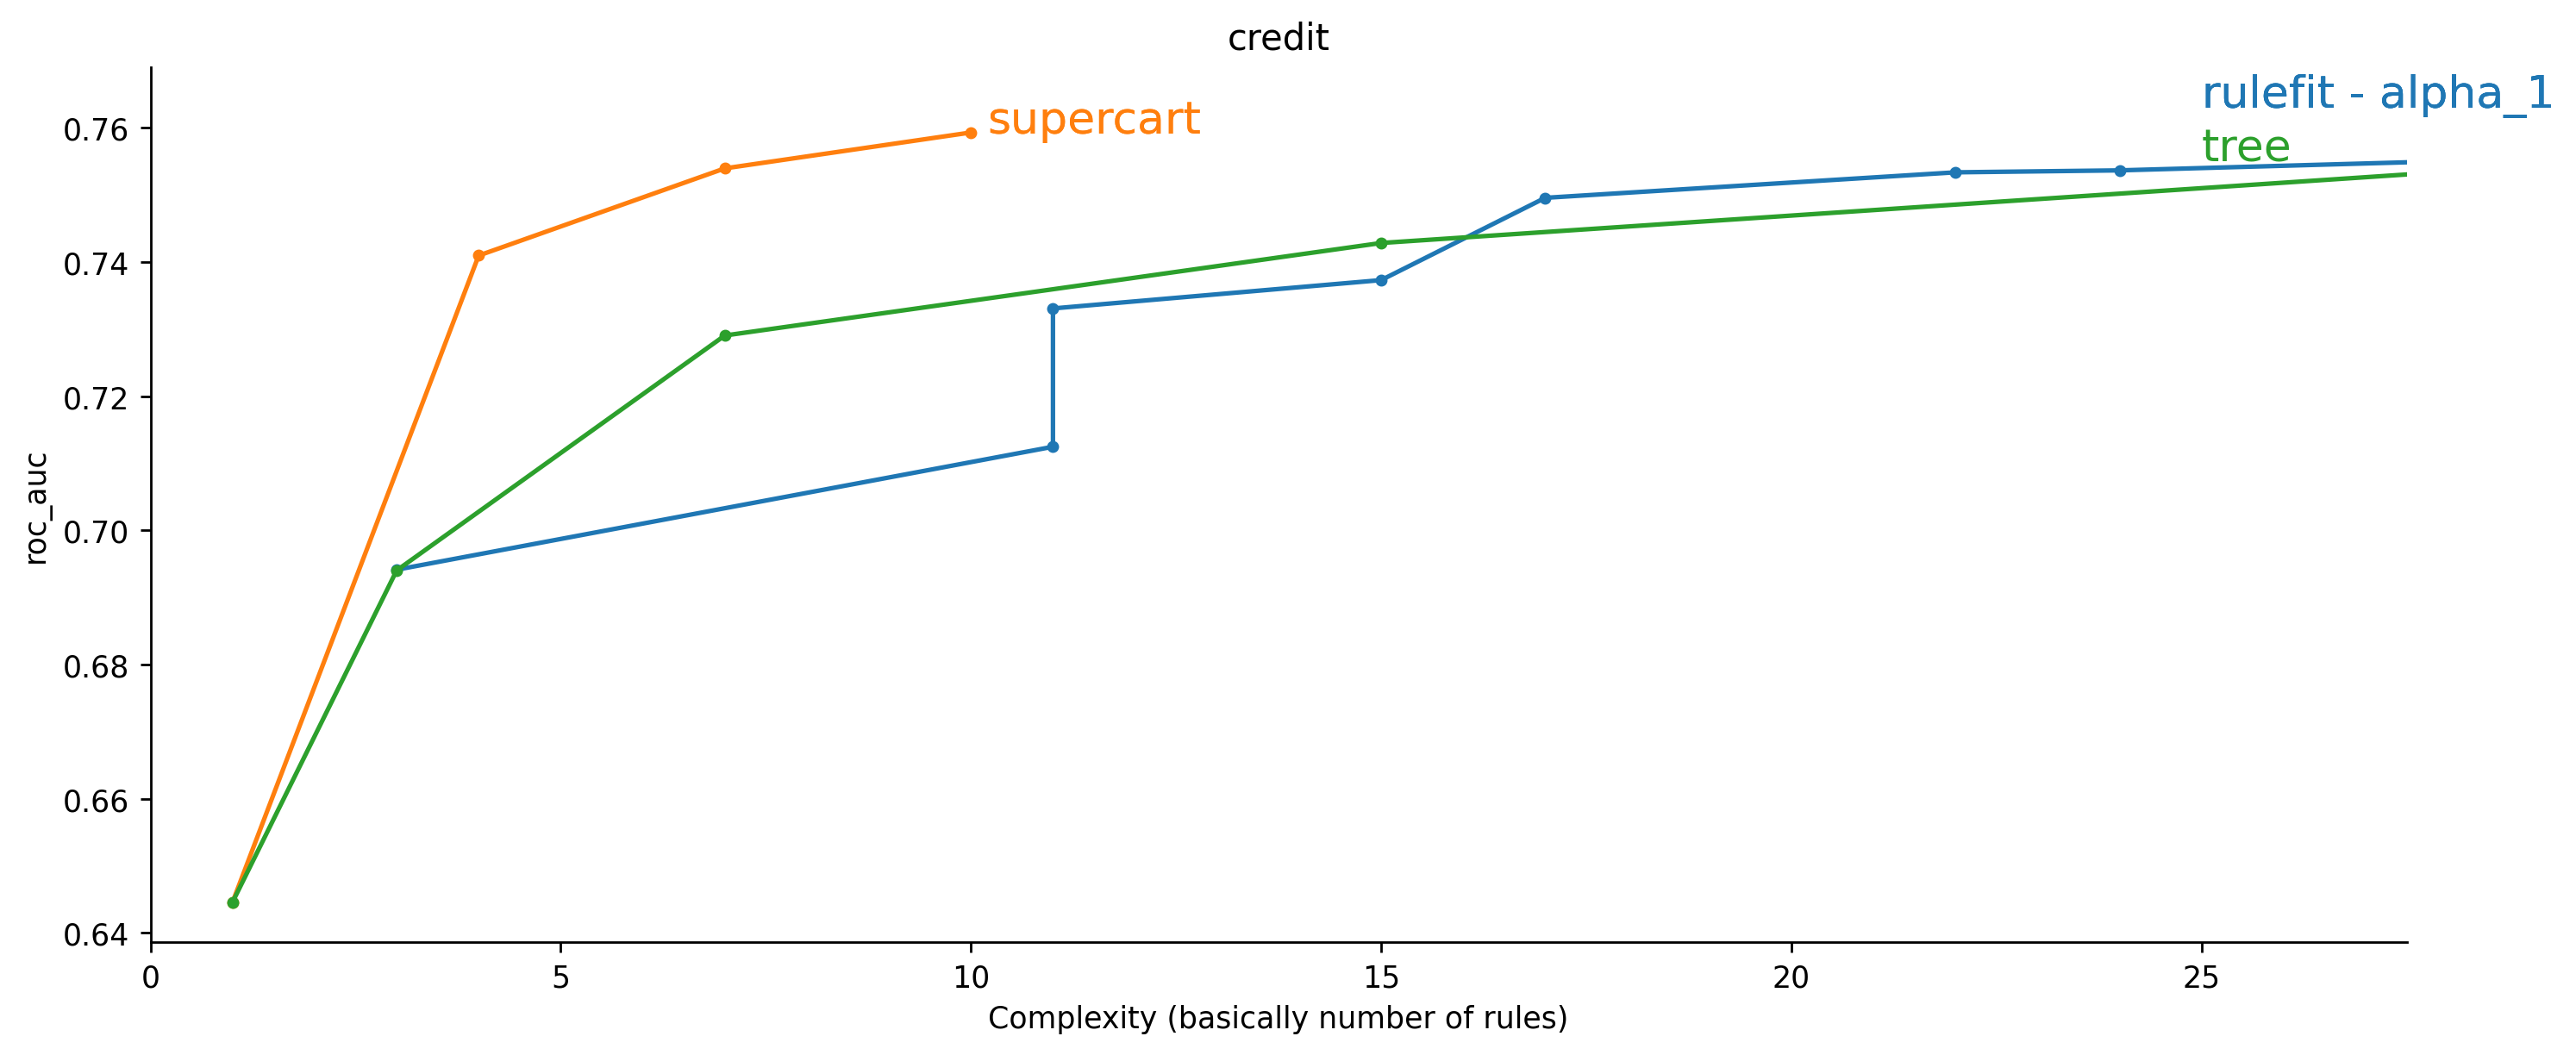

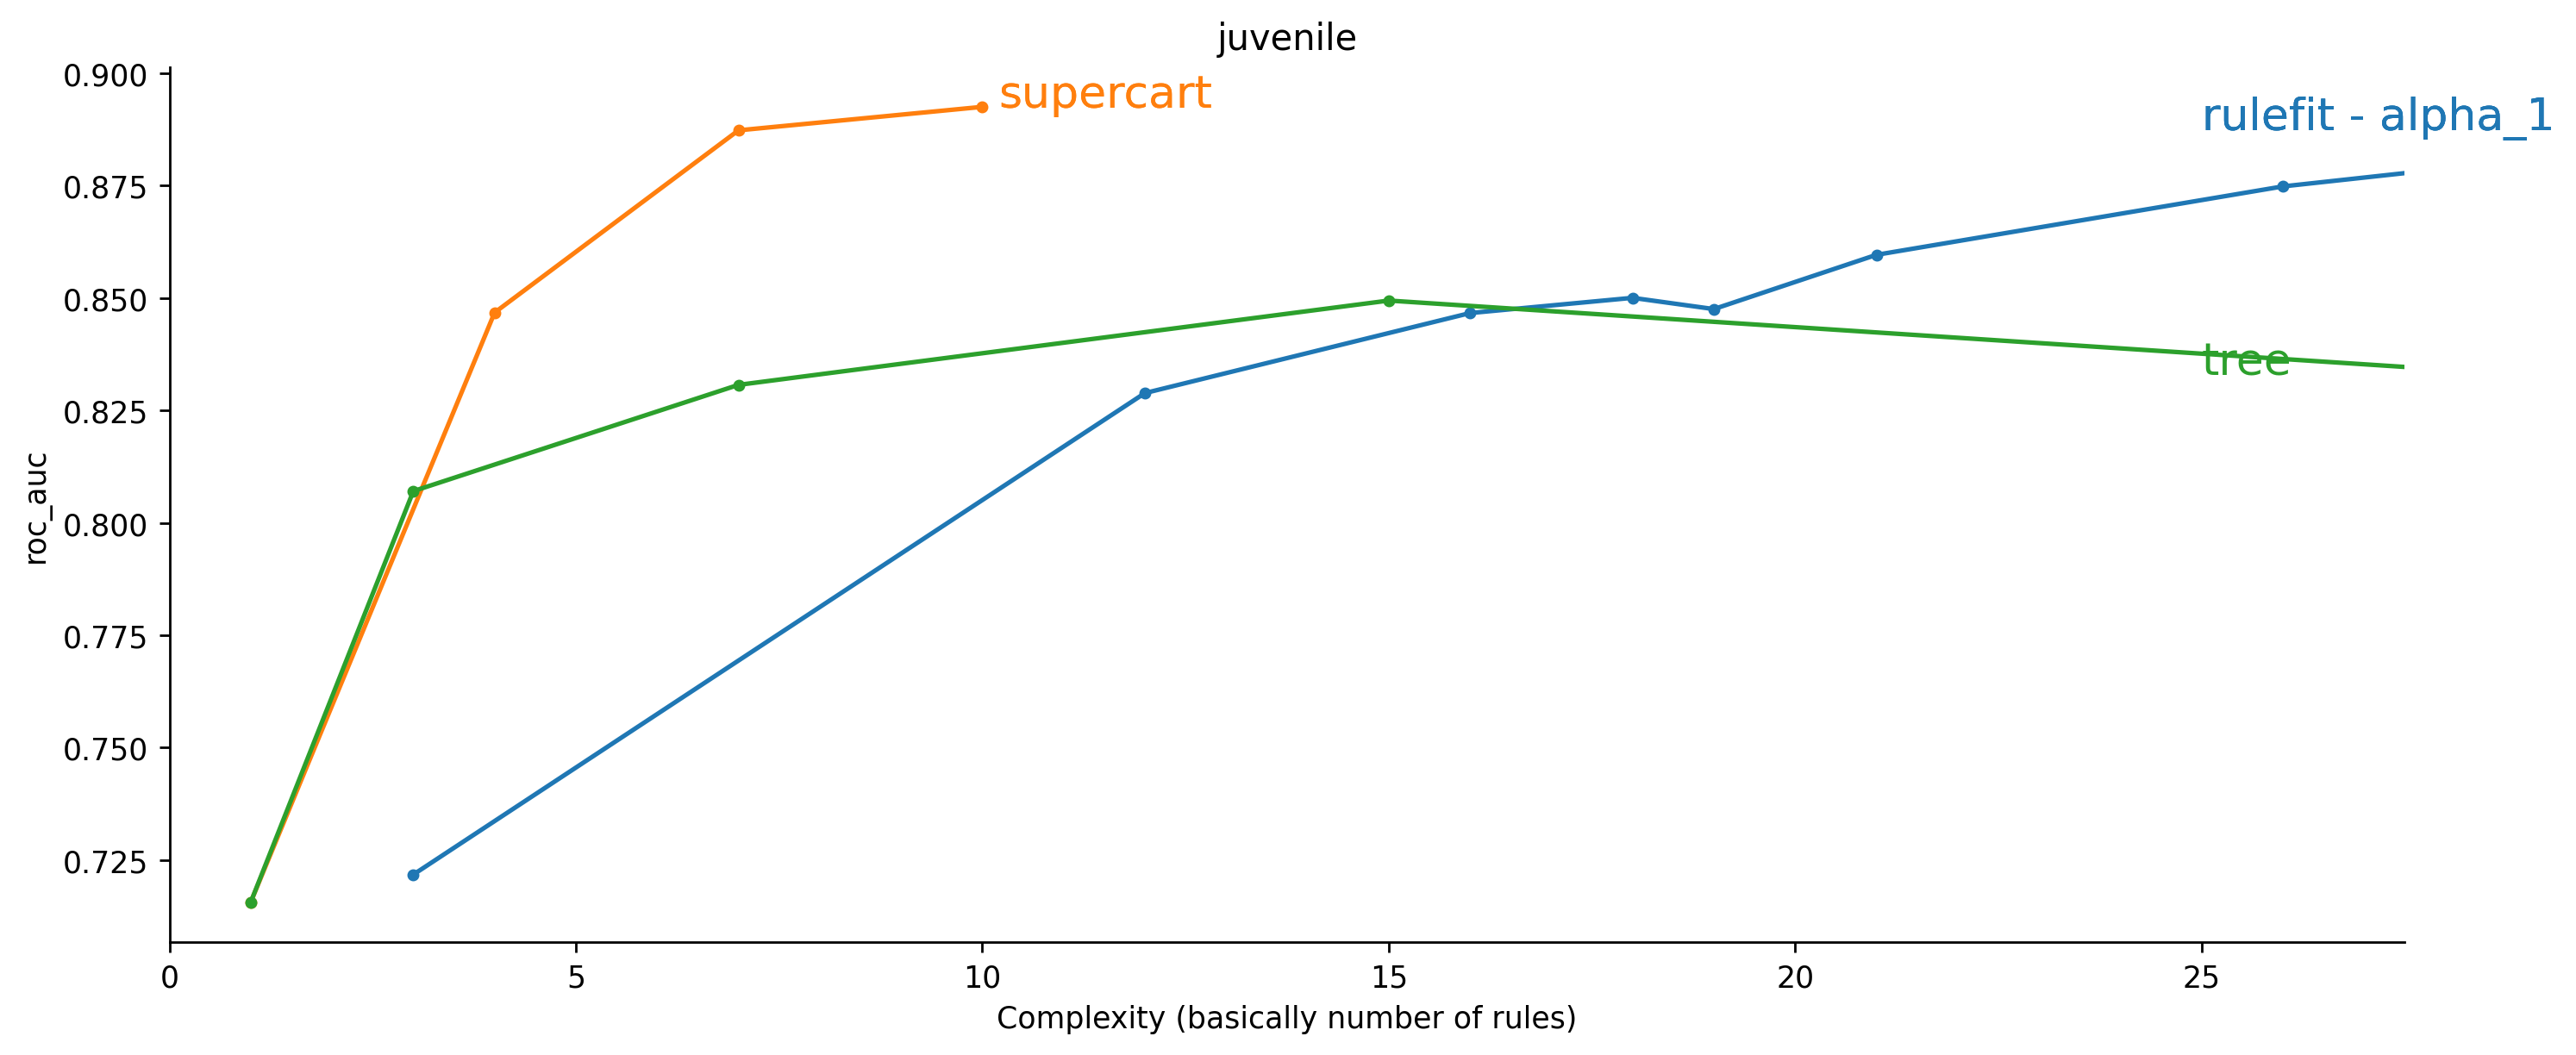

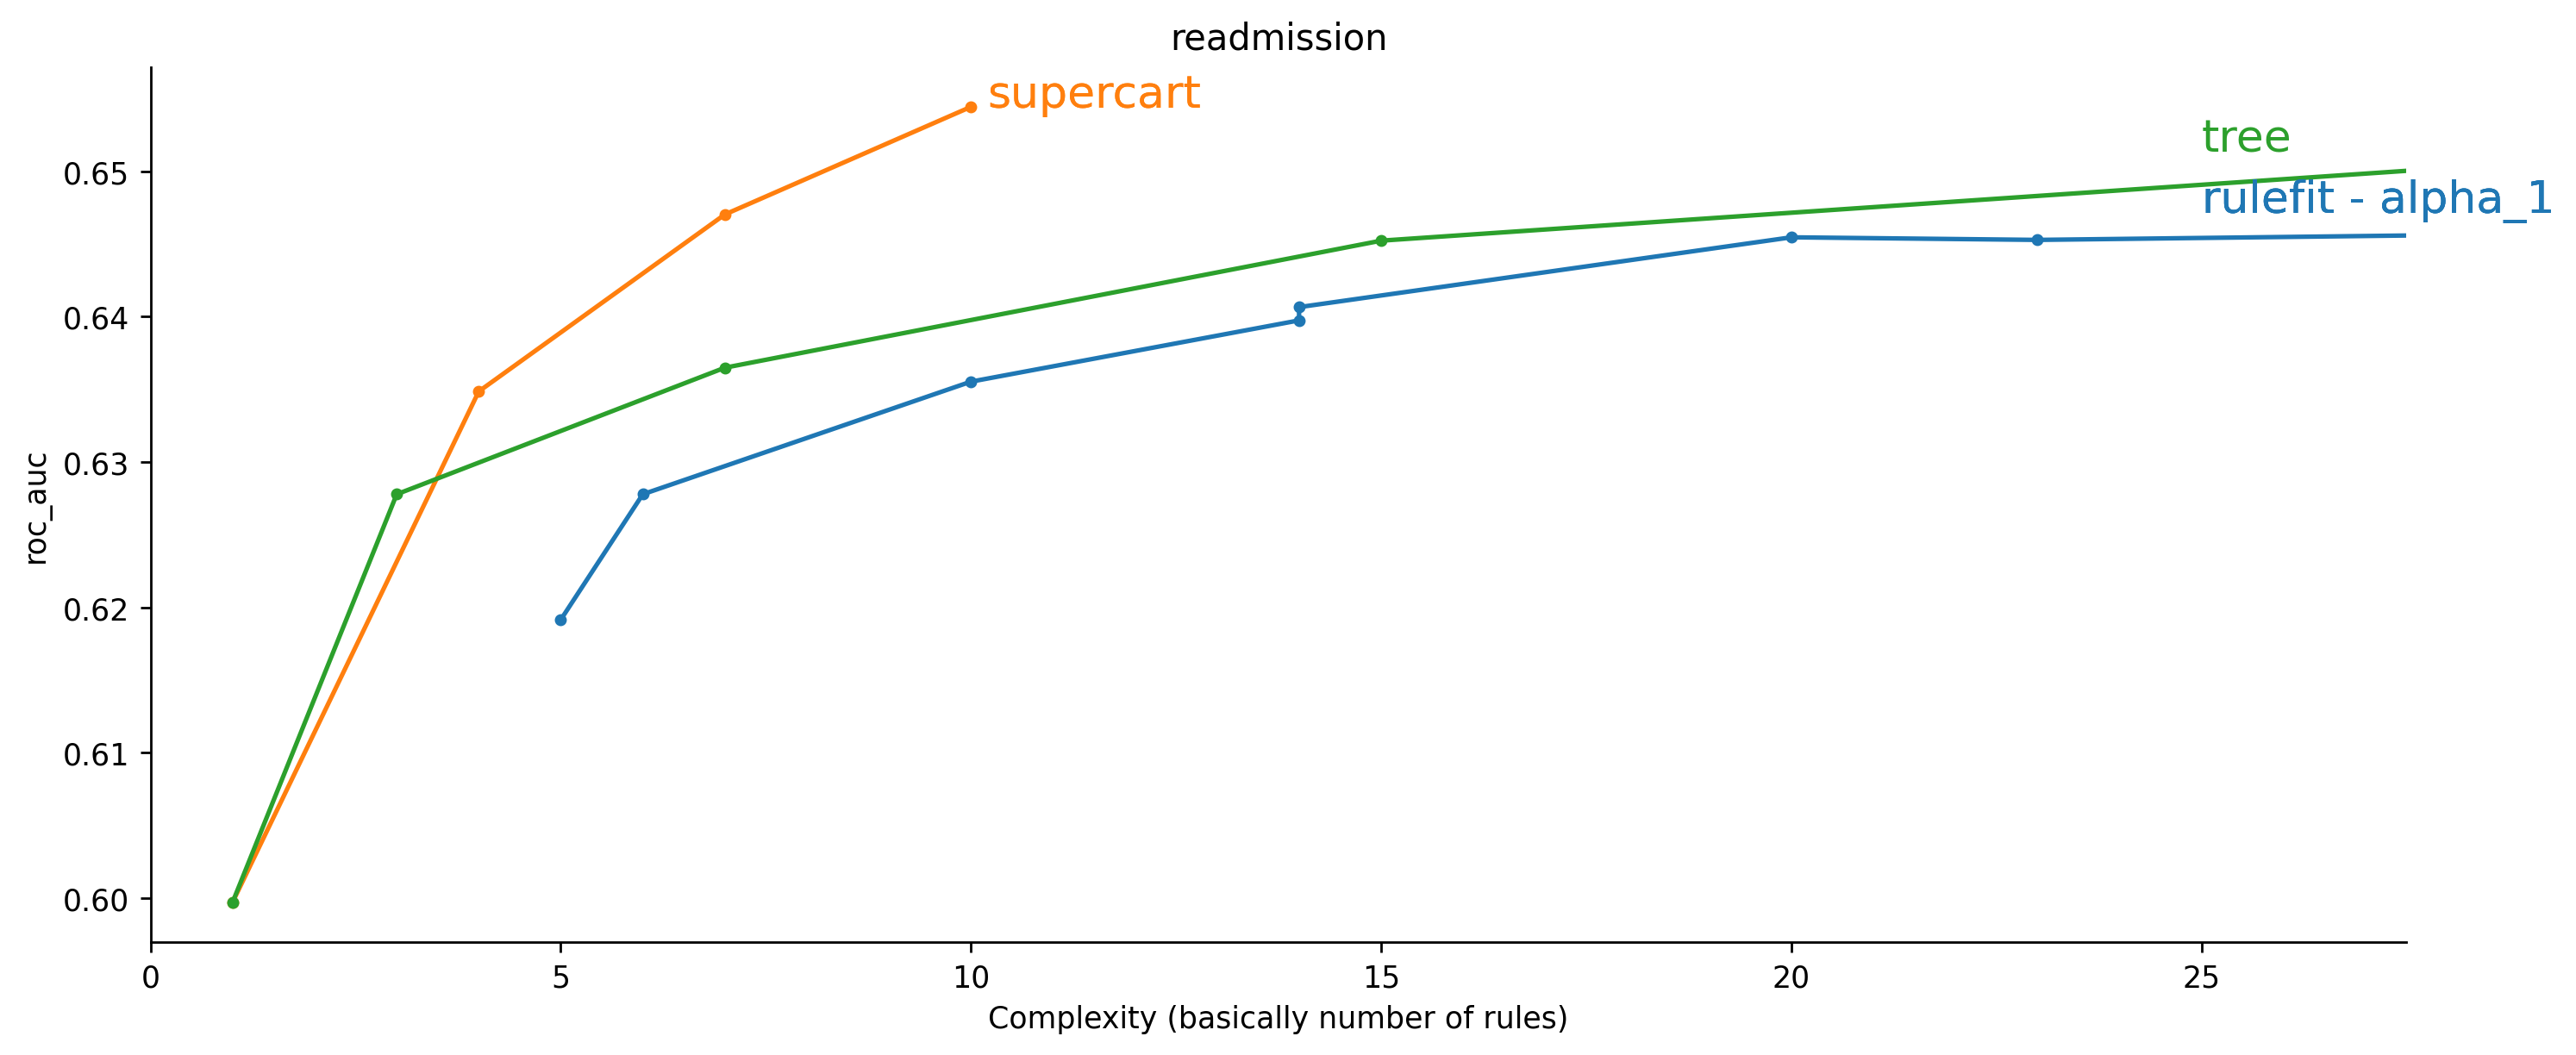

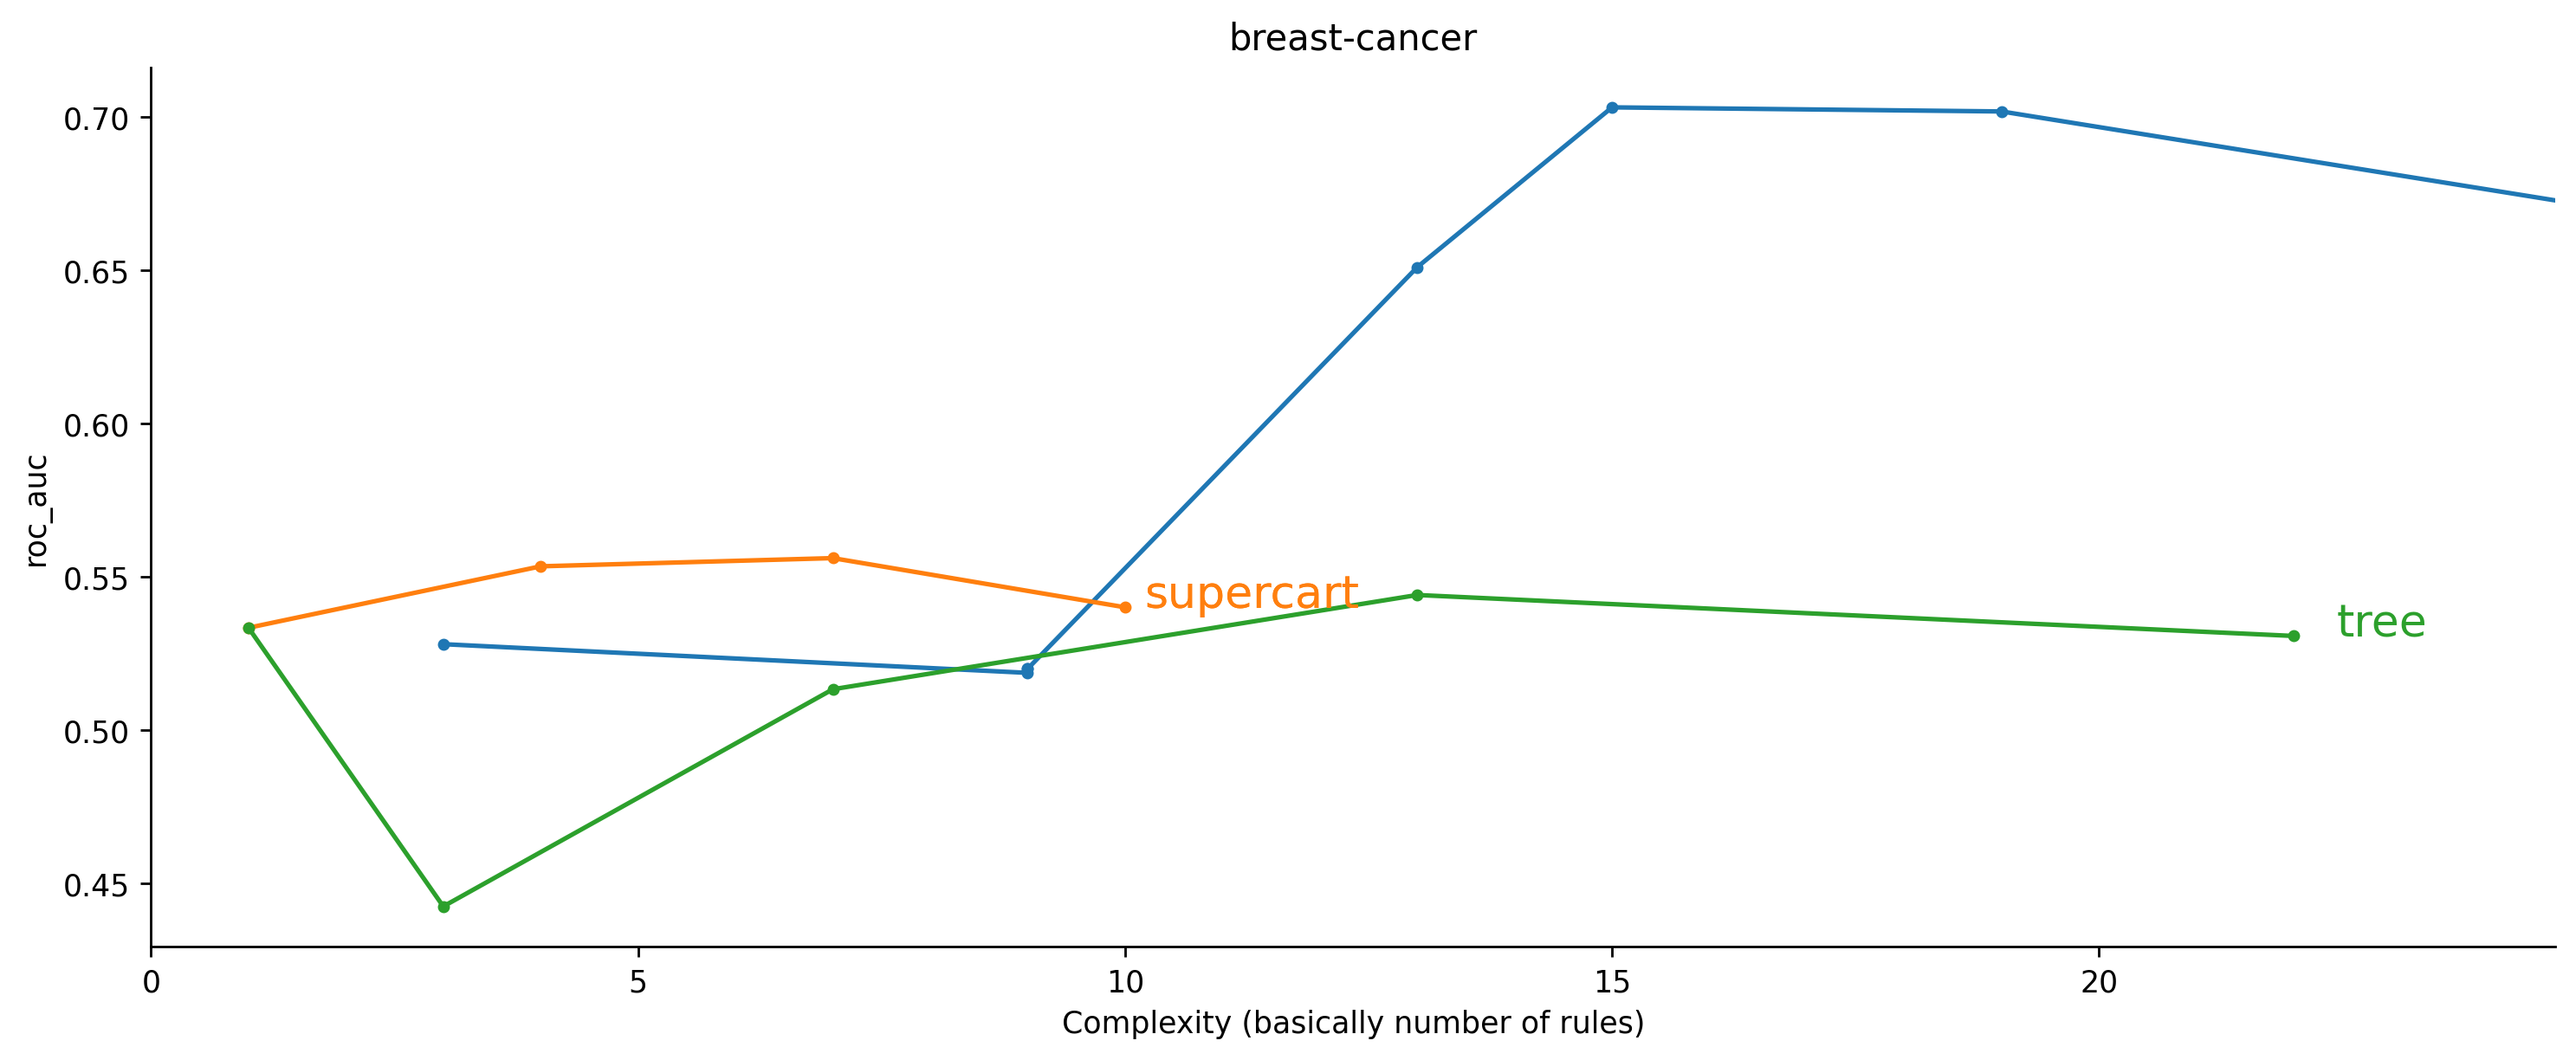

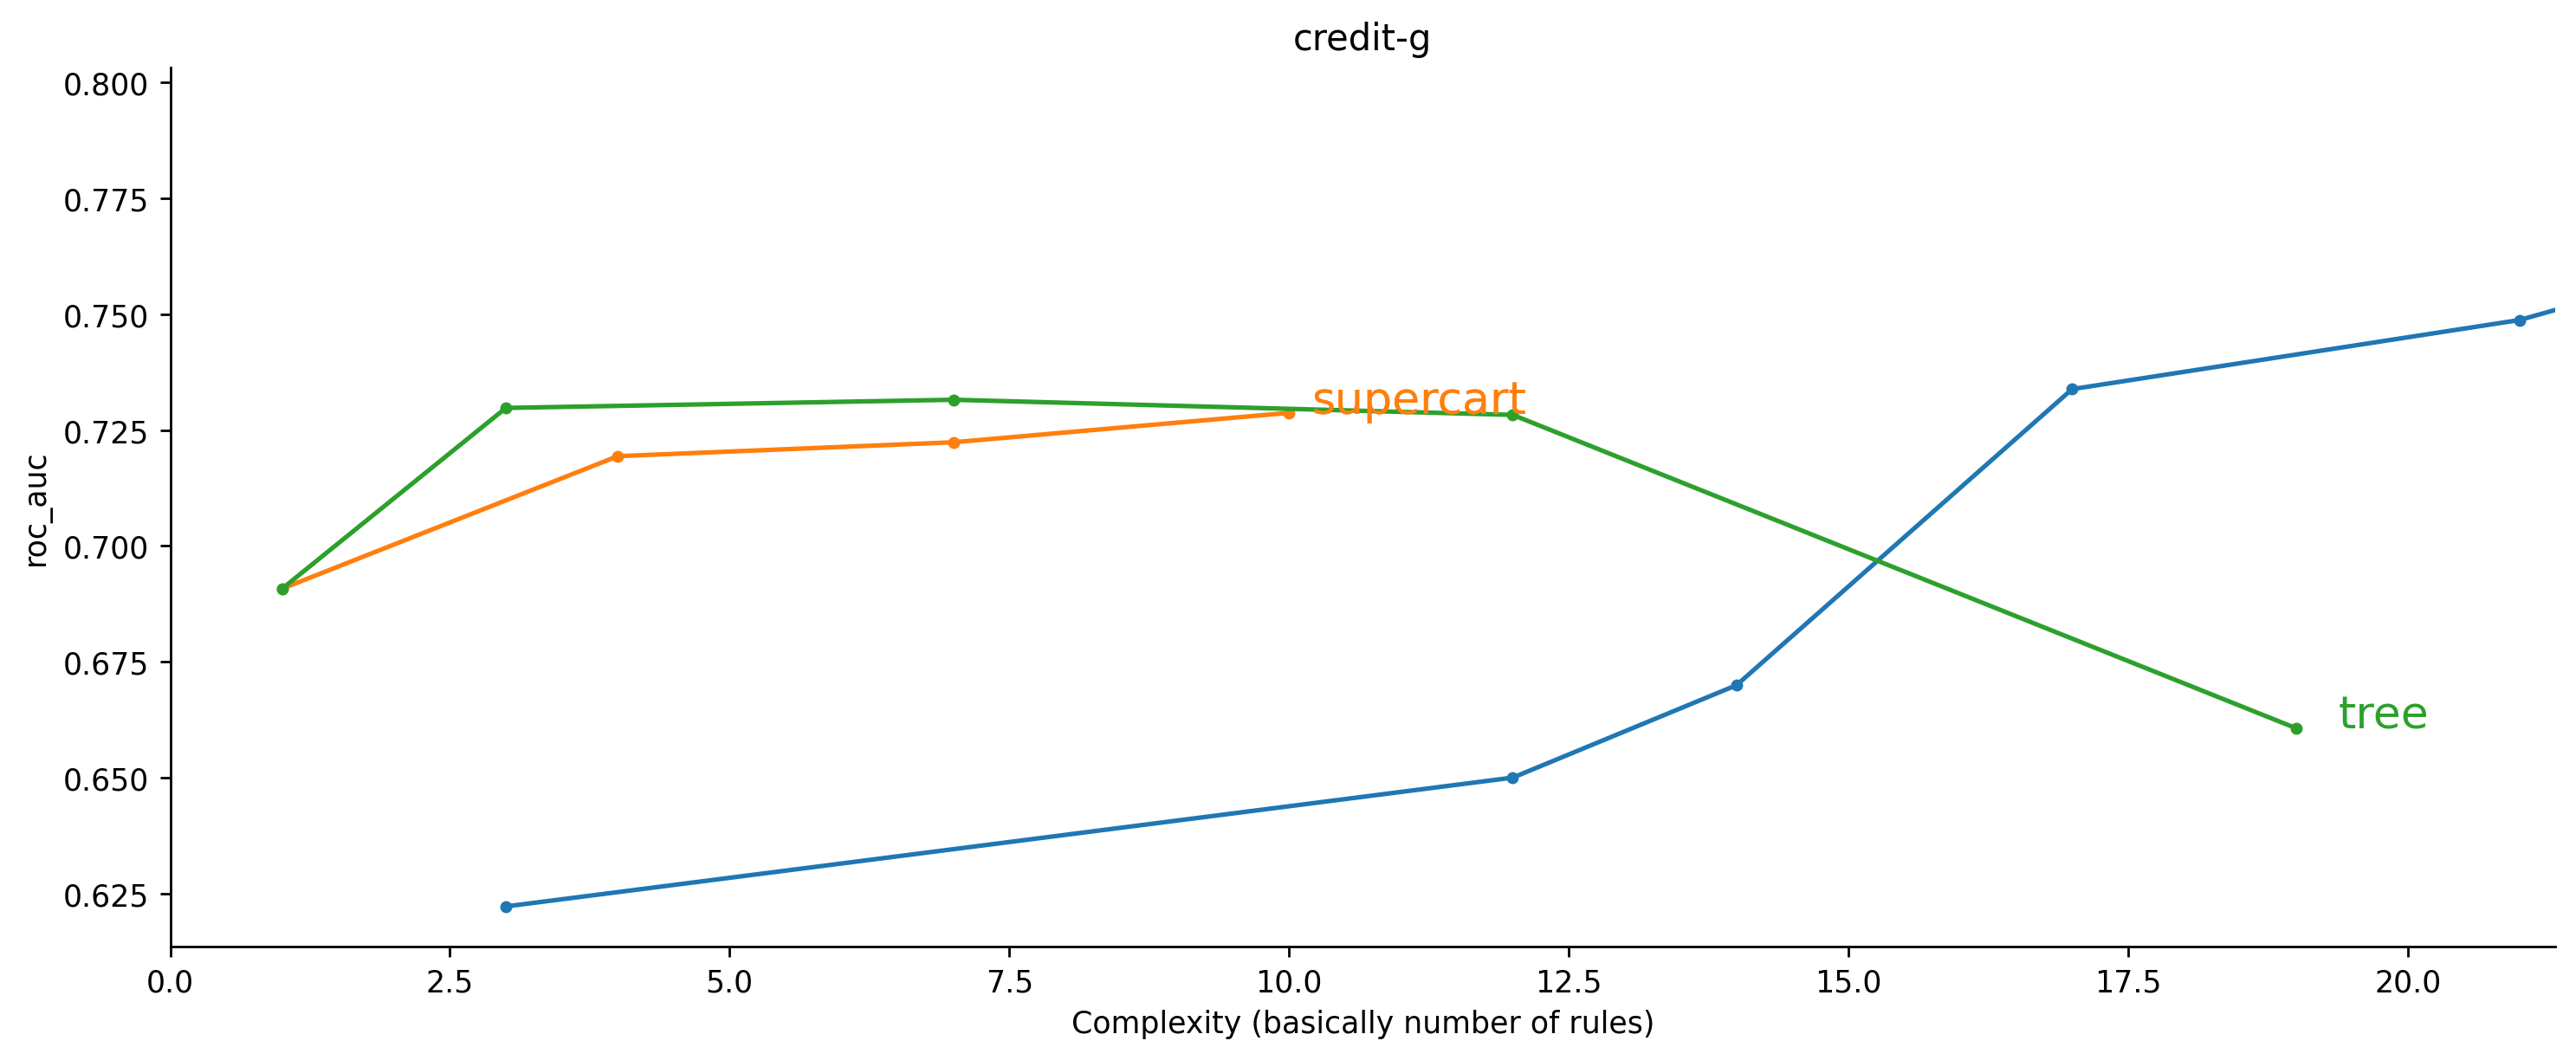

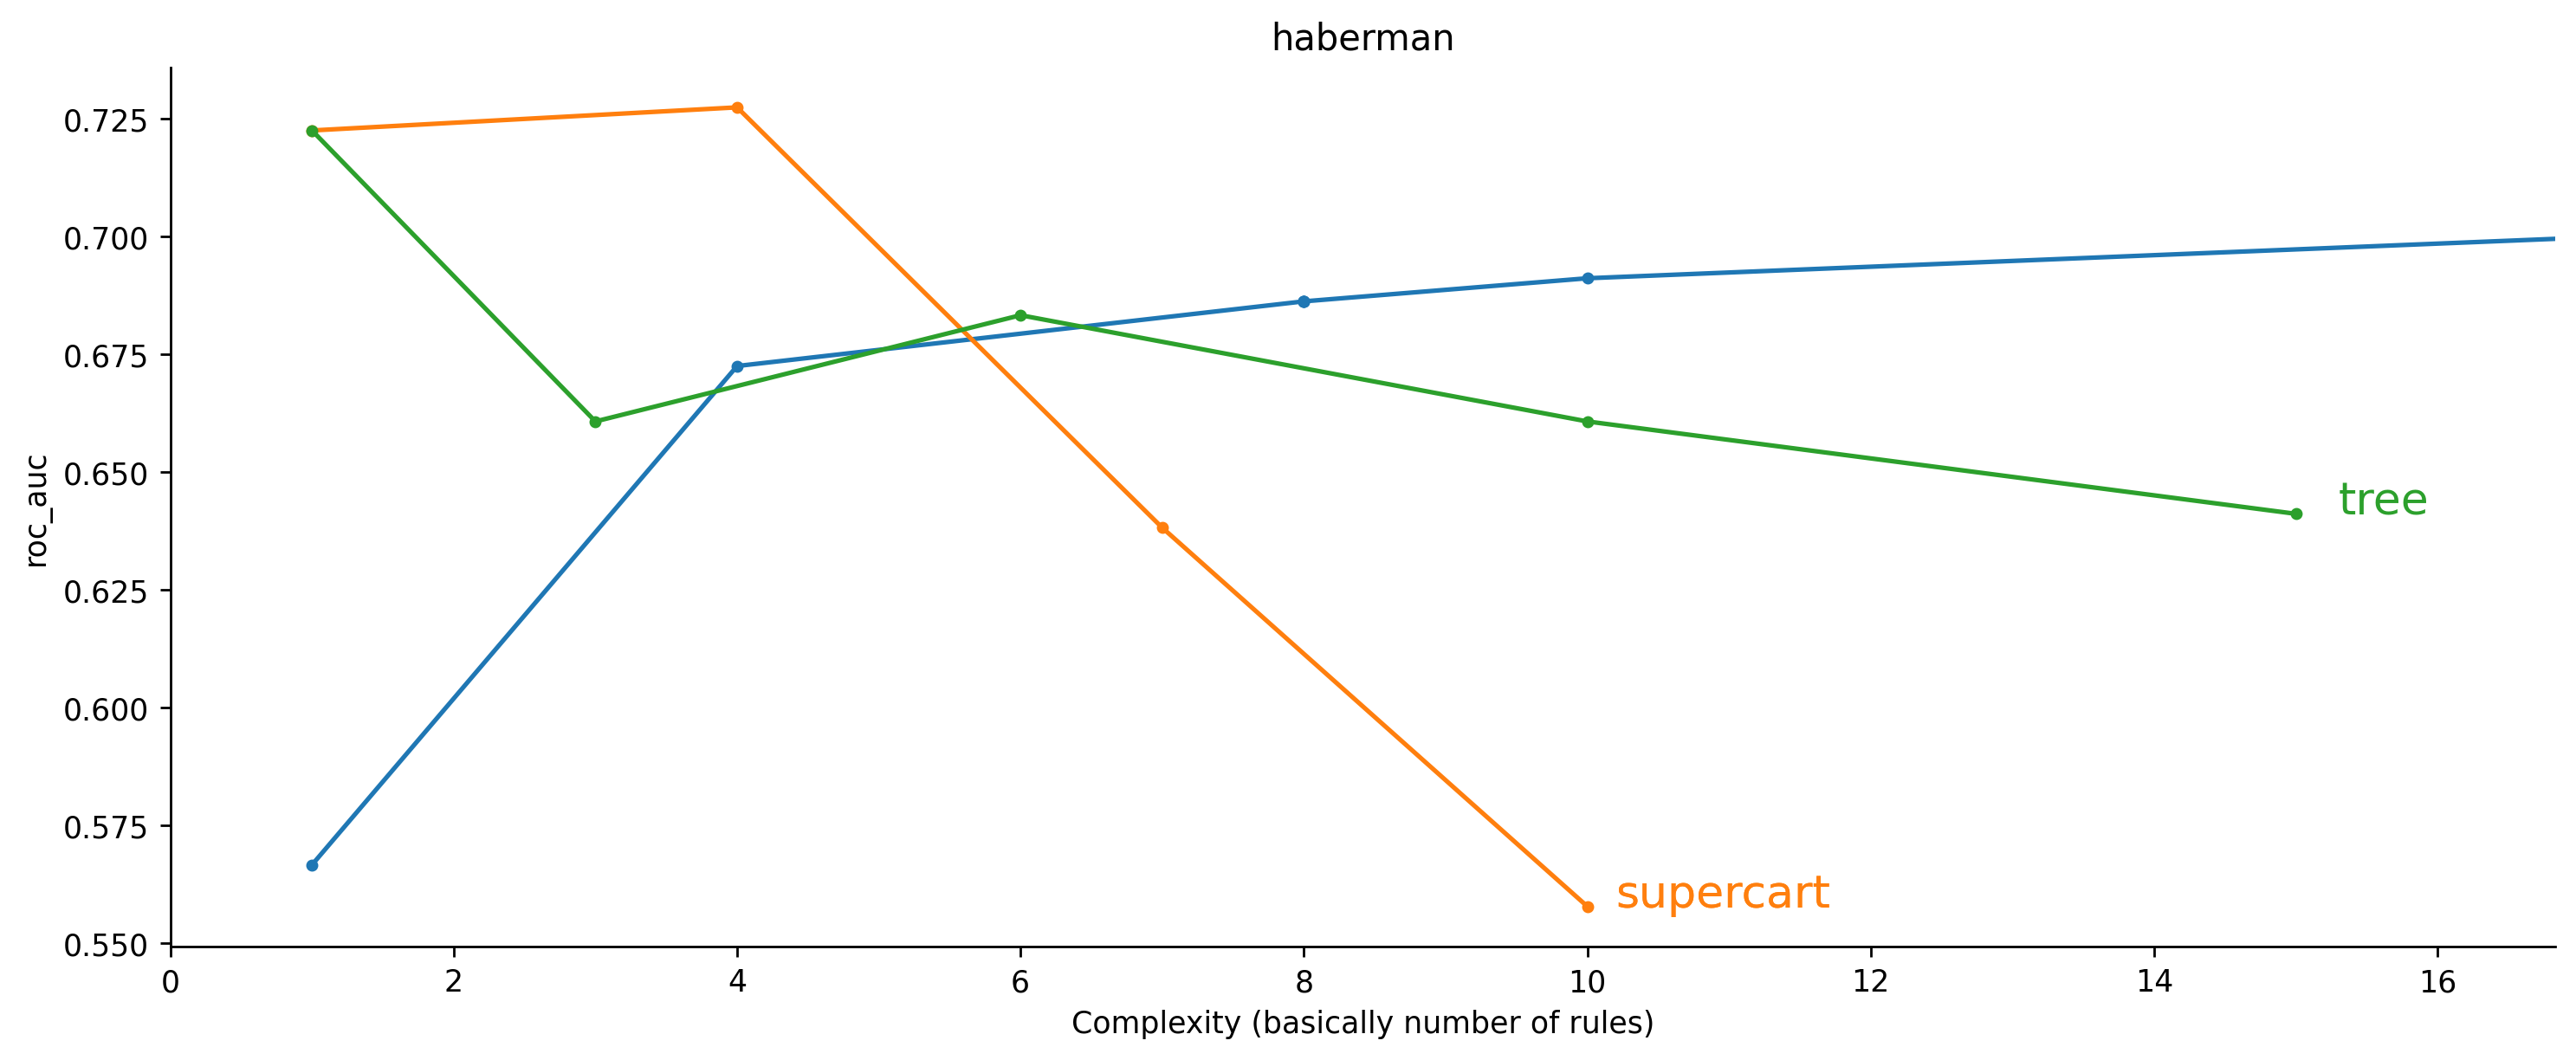

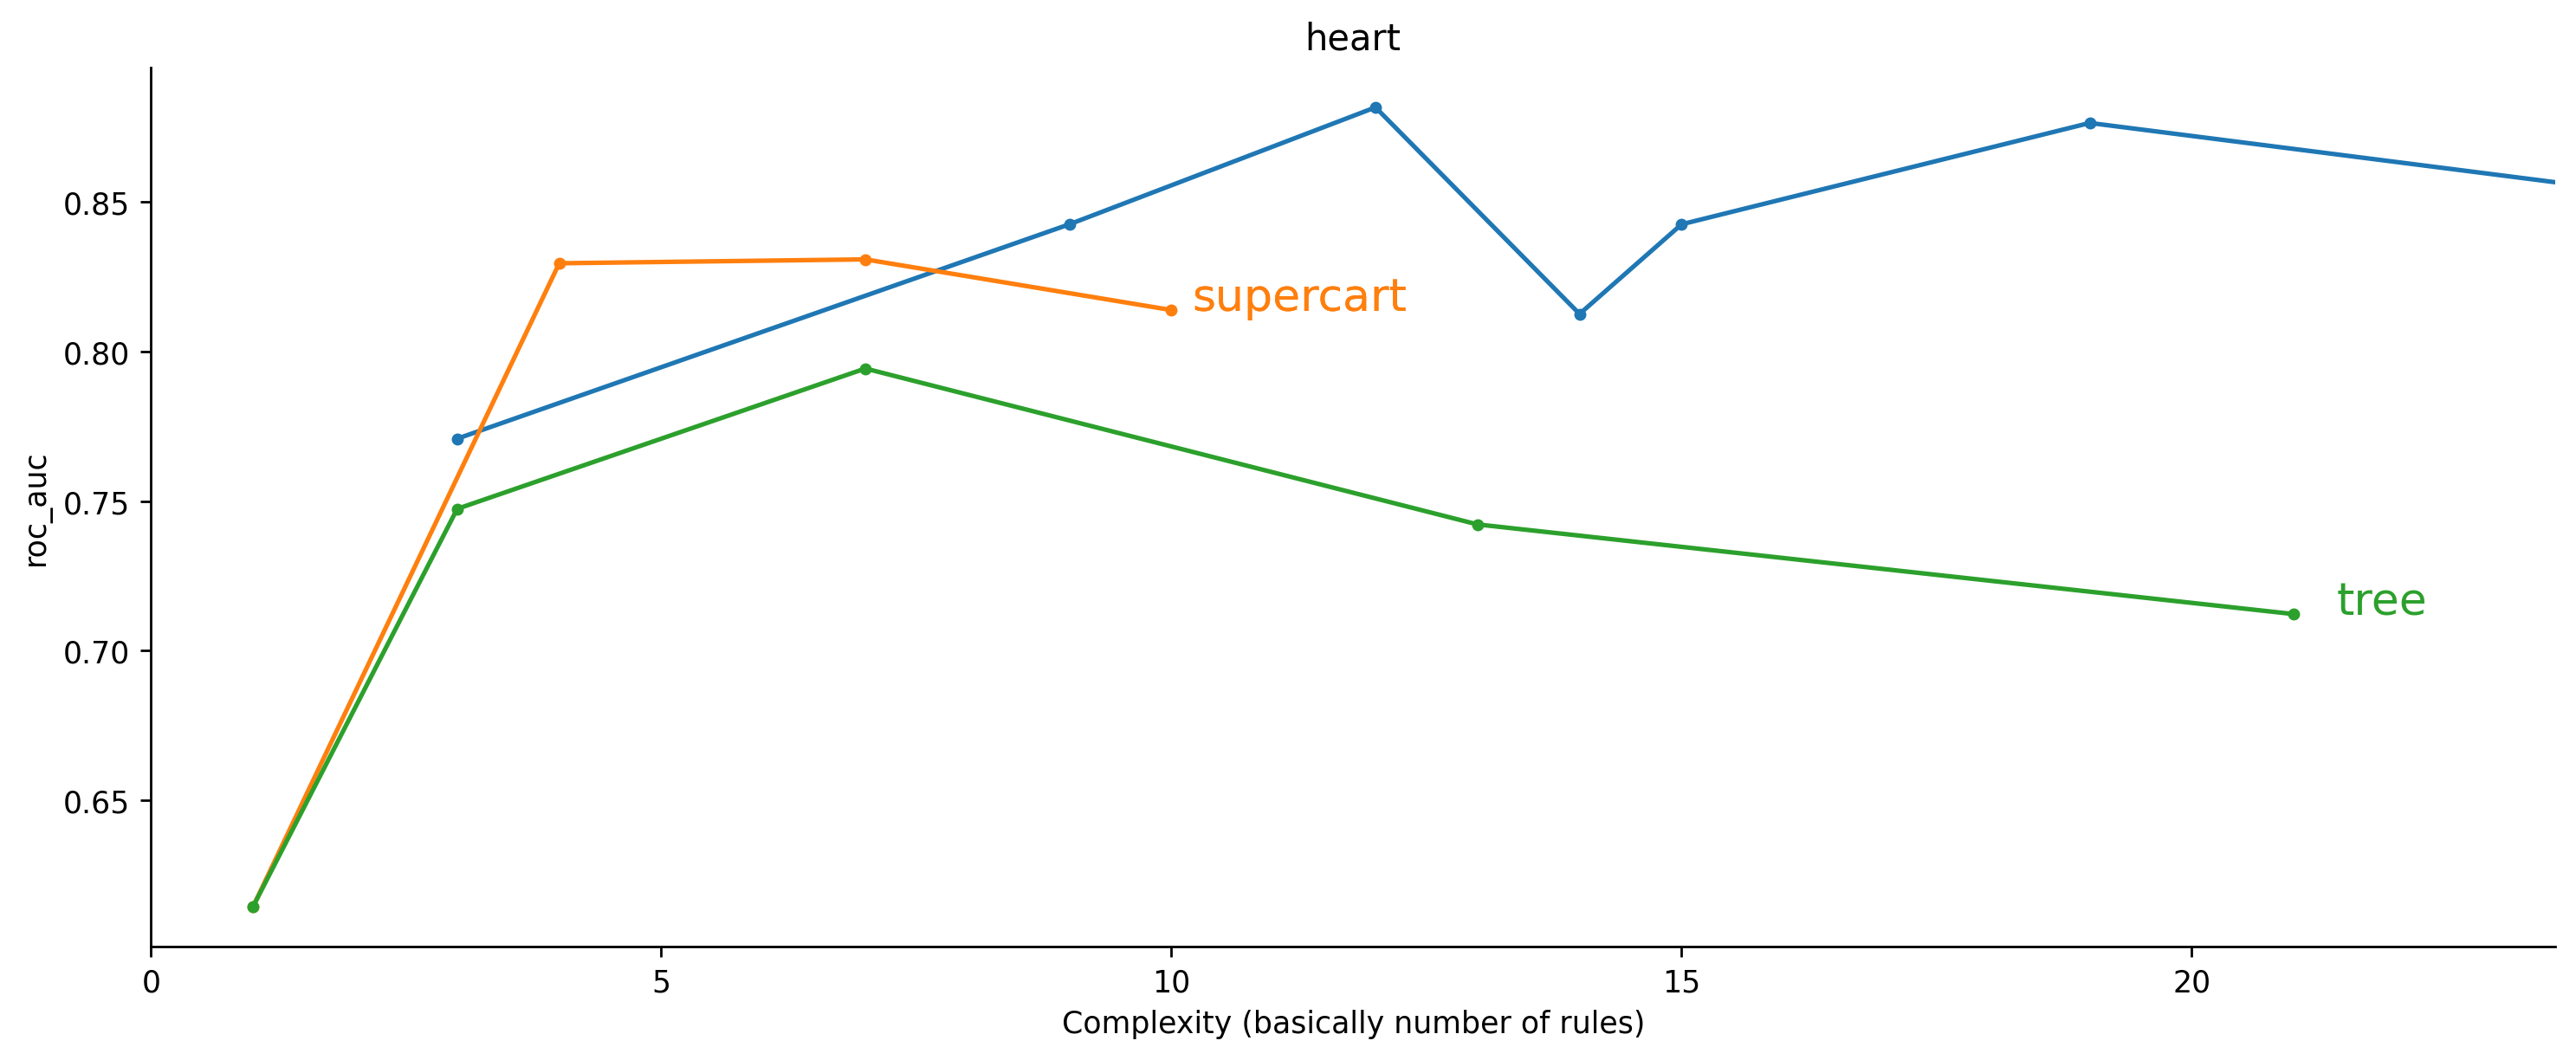

In [68]:
for dset in DATASETS:
    dset_name = dset[0]
    pkl_file = oj('../results', 'reg_data', dset_name, 'val/combined.pkl')
    df = pkl.load(open(pkl_file, 'rb'))['df']
    df['model'] = df.index
    
    plt.figure(figsize=(12, 5))
    for name, g in df.groupby('model'):
        args = np.argsort(g[f'{dset_name}_complexity'])
        plt.title(dset_name)
        plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_rocauc'][args], '.-', label=name)
        plt.xlabel('Complexity (basically number of rules)')
        plt.xlim((0, 25))
        plt.ylabel('roc_auc')
        dvu.line_legend()